In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Load files
df_clean = pd.read_csv("../data/bank_reviews_clean.csv")
df_sentiment = pd.read_csv("../data/bank_reviews_bert_sentiment.csv")
df_themes = pd.read_csv("../data/bank_reviews_thematic.csv")

In [4]:
# Merge all datasets (assuming index alignment)
df = pd.concat([df_clean, df_sentiment[['bert_sentiment']], df_themes[['themes']]], axis=1)

In [5]:
# Check structure
print(" Final shape:", df.shape)
print(" Columns:", df.columns)



 Final shape: (773, 8)
 Columns: Index(['review_text', 'rating', 'date', 'bank_name', 'source', 'clean_review',
       'bert_sentiment', 'themes'],
      dtype='object')


In [6]:
# Drop missing
df.dropna(subset=["bert_sentiment", "themes"], inplace=True)

# Rename for clarity
df.rename(columns={
    'bert_sentiment': 'Sentiment',
    'bank_name': 'Bank',
    'rating': 'Rating'
}, inplace=True)

## Visualization

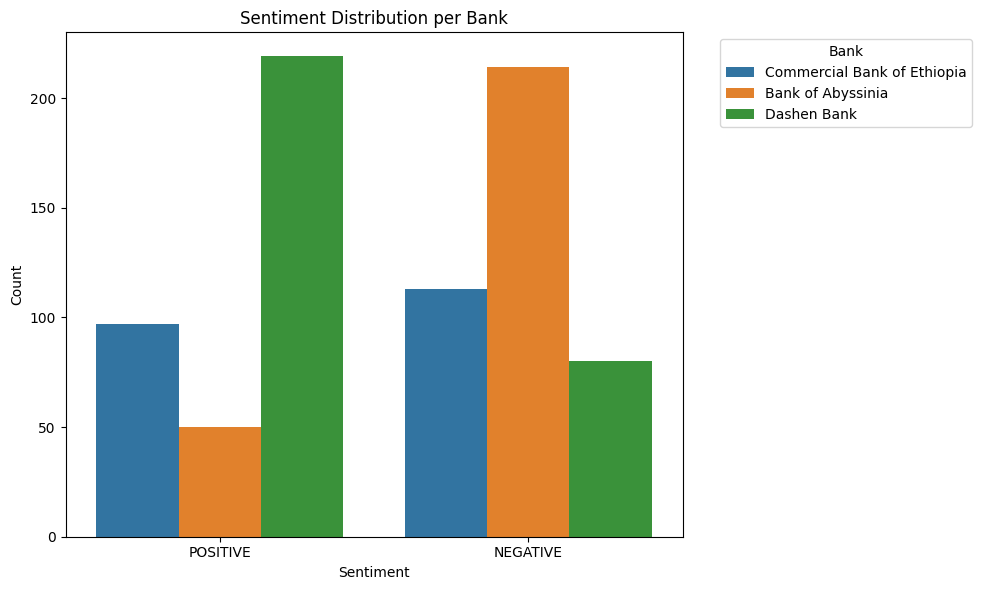

In [7]:
# sentiment distribution per bank
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Bank')
plt.title("Sentiment Distribution per Bank")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title="Bank", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

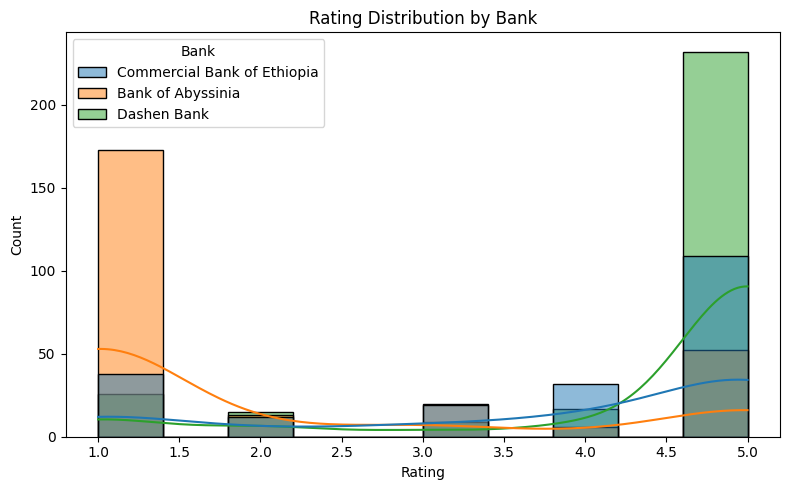

In [8]:
# Rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Rating', hue='Bank', kde=True, bins=10)
plt.title("Rating Distribution by Bank")
plt.tight_layout()
plt.show()


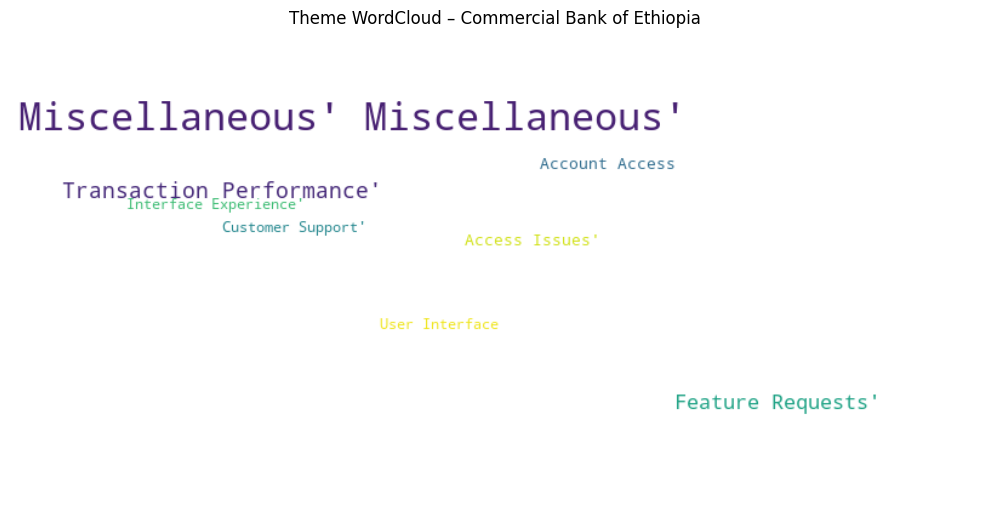

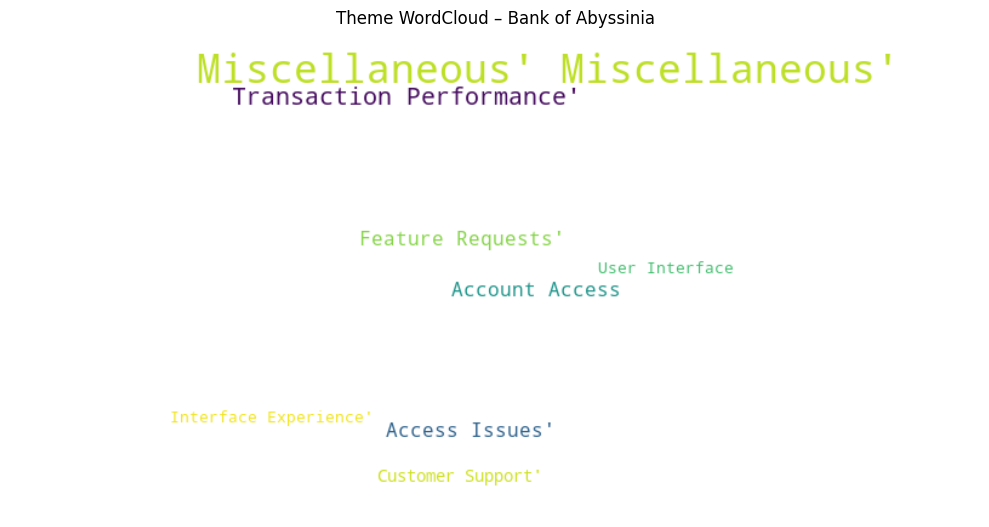

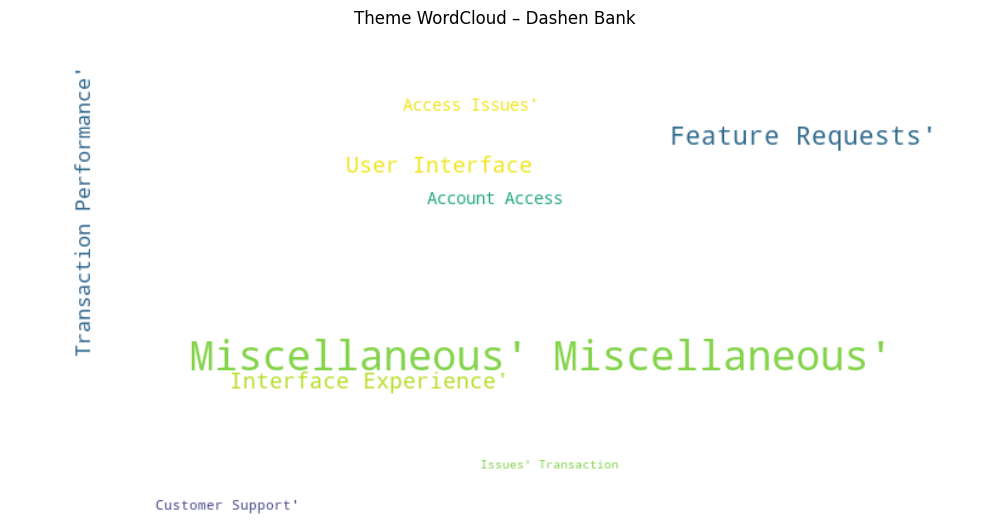

In [9]:
# WordCloud for Themes
for bank in df['Bank'].unique():
    plt.figure(figsize=(10, 6))
    text = ' '.join(df[df['Bank'] == bank]['themes'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Theme WordCloud – {bank}")
    plt.tight_layout()
    plt.show()

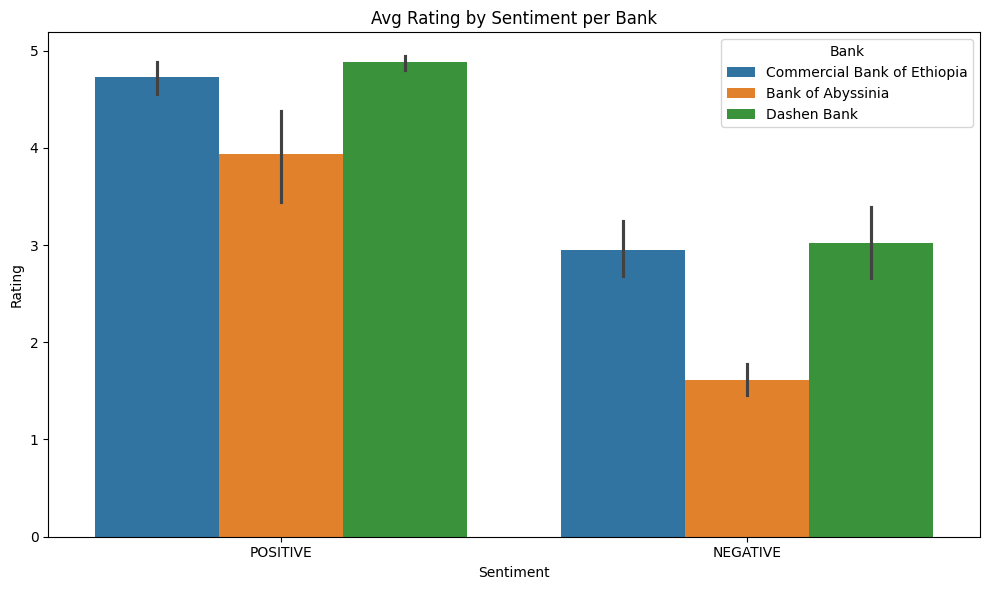

In [10]:
# Avg Rating by Sentiment
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sentiment', y='Rating', hue='Bank')
plt.title("Avg Rating by Sentiment per Bank")
plt.tight_layout()
plt.show()


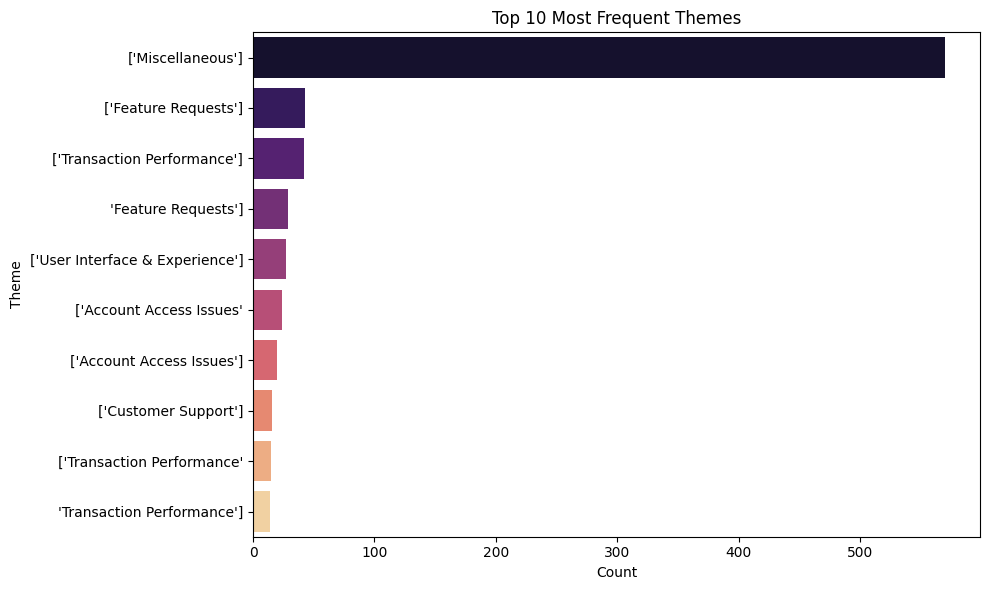

In [11]:
# Top 10 Themes 
all_themes = []
df['themes'].dropna().apply(lambda x: all_themes.extend([i.strip() for i in str(x).split(',')]))
theme_counts = Counter(all_themes)
theme_df = pd.DataFrame(theme_counts.items(), columns=["Theme", "Count"]).sort_values(by="Count", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=theme_df, x='Count', y='Theme', palette='magma')
plt.title("Top 10 Most Frequent Themes")
plt.tight_layout()
plt.show()